In [0]:
# If you are running Databricks Runtime, uncomment this line and run this cell:
#%pip install mlflow

In [0]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt

from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
pip install mlflow

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 12.6 MB/s eta 0:00:00
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.9 MB/s eta 0:00:00
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Using cached GitPython-3.1.42-py3-none-any.whl (195 kB)
  Using cached Markdown-3.5.2-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
  Using ca

In [0]:
db = load_diabetes()
X = db.data
y = db.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

2024/02/21 14:20:09 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.10.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


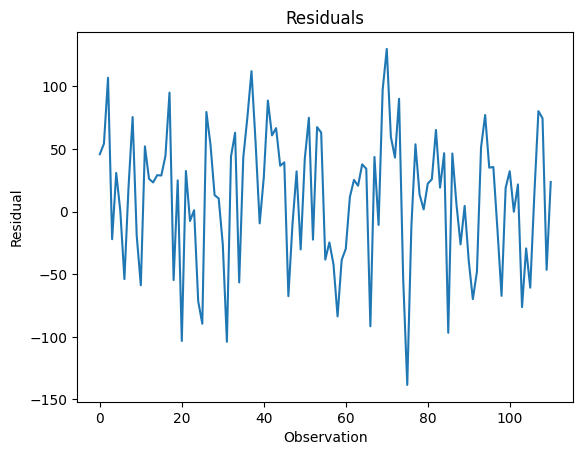

In [0]:
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 5
  max_features = 4
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test)
  
  # Log the model parameters used for this run.
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Define a metric to use to evaluate the model.
  mse = mean_squared_error(y_test, predictions)
    
  # Log the value of the metric from this run.
  mlflow.log_metric("mse", mse)
  
  # Log the model created by this run.
  mlflow.sklearn.log_model(rf, "random-forest-model") 
  
  # Save the table of predicted values
  savetxt('predictions.csv', predictions, delimiter=',')
  
  # Log the saved table as an artifact
  mlflow.log_artifact("predictions.csv")
  
  # Convert the residuals to a pandas dataframe to take advantage of graphics capabilities
  df = pd.DataFrame(data = predictions - y_test)
  # Create a plot of residuals
  plt.plot(df)
  plt.xlabel("Observation")
  plt.ylabel("Residual")
  plt.title("Residuals")

  # Save the plot and log it as an artifact
  
  plt.savefig("residuals_plot.png")
  mlflow.log_artifact("residuals_plot.png")